In [43]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score as accuracy
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [68]:
data = datasets.load_iris()

In [69]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
X = X.to_numpy()

y = data['target']

In [70]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True)

In [71]:
y_train = np_utils.to_categorical(y_train)

In [ ]:
model = Sequential()

model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [82]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
history = model.fit(x_train, y_train, validation_split=0.25, epochs=500, batch_size=10)

Epoch 1/500
11/11 [==============================] - 1s 23ms/step - loss: 1.4460 - accuracy: 0.3366 - val_loss: 1.3507 - val_accuracy: 0.2941
Epoch 2/500
11/11 [==============================] - 0s 5ms/step - loss: 1.2906 - accuracy: 0.3366 - val_loss: 1.2300 - val_accuracy: 0.2941
Epoch 3/500
11/11 [==============================] - 0s 5ms/step - loss: 1.2042 - accuracy: 0.3366 - val_loss: 1.1602 - val_accuracy: 0.2941
Epoch 4/500
11/11 [==============================] - 0s 6ms/step - loss: 1.1460 - accuracy: 0.3366 - val_loss: 1.1143 - val_accuracy: 0.2059
Epoch 5/500
11/11 [==============================] - 0s 6ms/step - loss: 1.1091 - accuracy: 0.3069 - val_loss: 1.0812 - val_accuracy: 0.4706
Epoch 6/500
11/11 [==============================] - 0s 6ms/step - loss: 1.0784 - accuracy: 0.4950 - val_loss: 1.0519 - val_accuracy: 0.5588
Epoch 7/500
11/11 [==============================] - 0s 6ms/step - loss: 1.0455 - accuracy: 0.5545 - val_loss: 1.0154 - val_accuracy: 0.5882
Epoch 8/500


In [75]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 8)                 40        
                                                                 
 dense_22 (Dense)            (None, 8)                 72        
                                                                 
 dense_23 (Dense)            (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.weights

[<tf.Variable 'dense_21/kernel:0' shape=(4, 8) dtype=float32, numpy=
 array([[-0.6250084 , -0.04616839, -0.3769218 ,  0.3942484 , -0.24088457,
          0.0512157 ,  0.33996543,  0.39506984],
        [ 0.03985506,  0.20540687,  0.6499306 ,  0.39565668,  0.27793282,
          0.6464898 , -0.46680453,  0.29420772],
        [-0.02542889,  0.7398026 ,  0.12064586,  0.01490501, -0.41317567,
         -0.05863378,  0.8505429 , -0.3175683 ],
        [ 0.13644367,  0.5913873 ,  0.34014648, -0.1768007 , -0.27505404,
         -0.27024952,  0.51359135, -0.5950523 ]], dtype=float32)>,
 <tf.Variable 'dense_21/bias:0' shape=(8,) dtype=float32, numpy=
 array([ 0.        , -0.38165215, -0.09519235,  0.31909043,  0.        ,
         0.3047337 , -0.24092564,  0.6488889 ], dtype=float32)>,
 <tf.Variable 'dense_22/kernel:0' shape=(8, 8) dtype=float32, numpy=
 array([[-0.5433194 , -0.21670312,  0.2835549 ,  0.21420604, -0.19129747,
          0.302194  , -0.5428881 ,  0.39054972],
        [-0.27896407,  0.5

In [84]:
preds = model.predict(x_test)
preds = np.argmax(preds, axis=1)

In [85]:
accuracy(preds, y_test)

0.9333333333333333

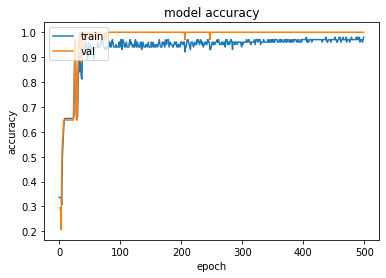

In [86]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

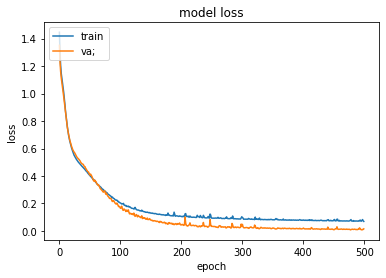

In [87]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()